Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

<ipython-input-3-eec539c812e0>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")


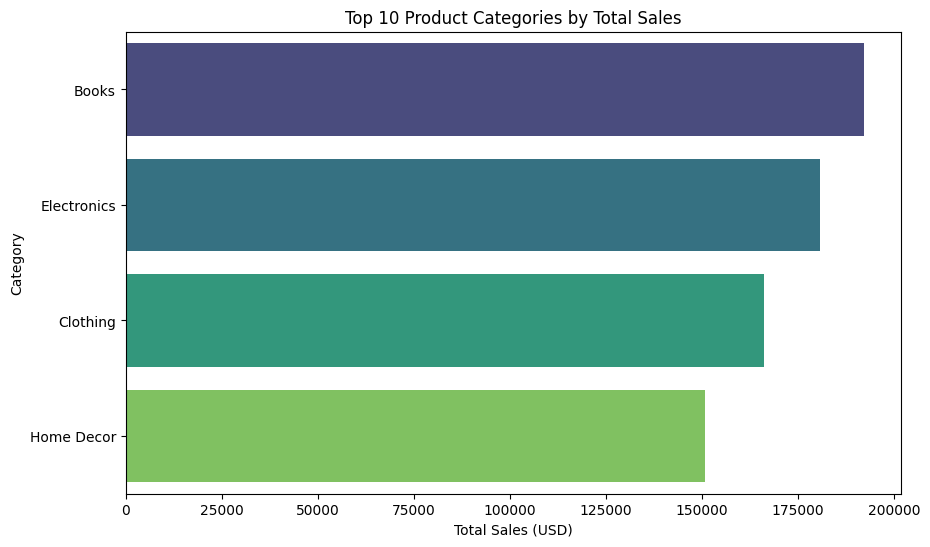

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic information about each dataset
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

# Check for missing values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print("Customers:\n", customers.describe(include='all'))
print("Products:\n", products.describe(include='all'))
print("Transactions:\n", transactions.describe())

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID", how="left")
merged_data = merged_data.merge(products, on="ProductID", how="left")

# Plot 1: Top 10 Product Categories by Total Sales
category_sales = merged_data.groupby("Category")['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")
plt.title("Top 10 Product Categories by Total Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Category")
plt.show()


<ipython-input-2-c4b2f74f71b5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='muted')


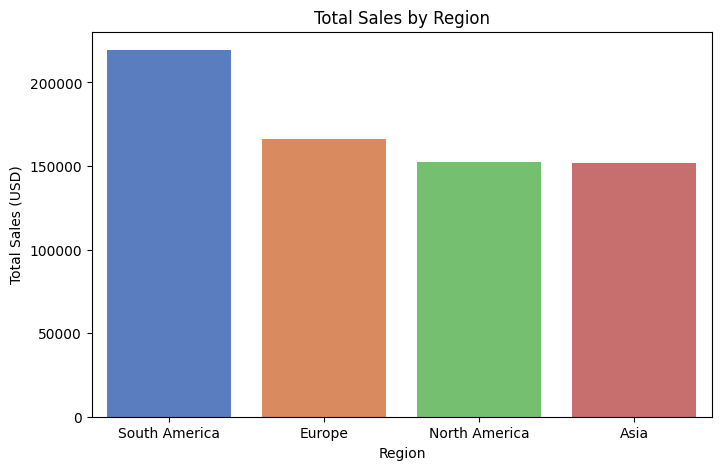

Average Days from Signup to First Transaction by Region:
Region
Asia             354.688073
Europe           341.965812
North America    229.303279
South America    449.773026
Name: SignupToTransactionDays, dtype: float64


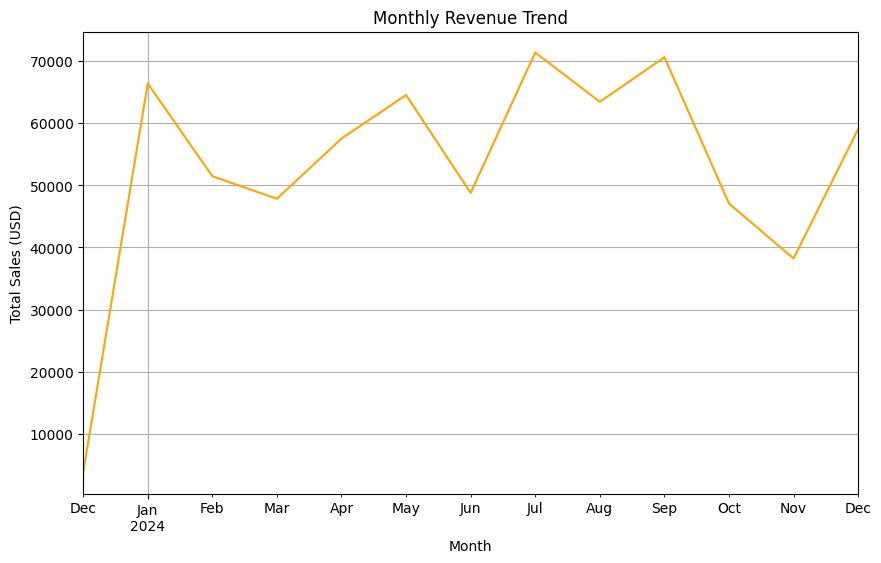

<ipython-input-2-c4b2f74f71b5>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='cool')


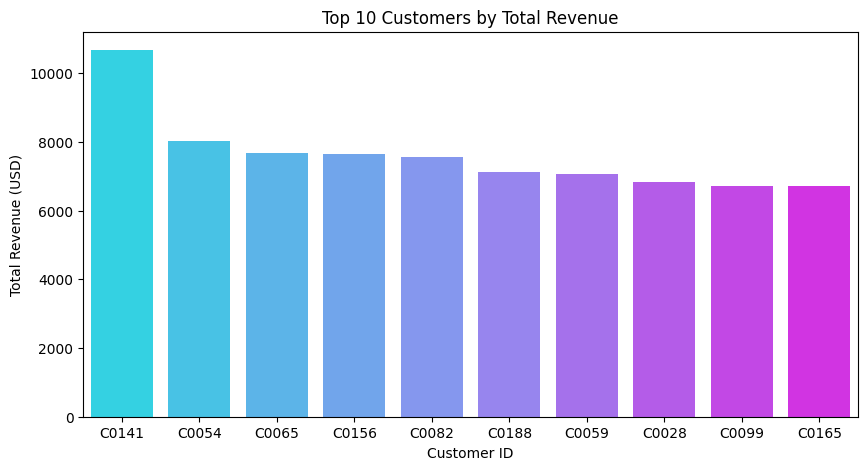

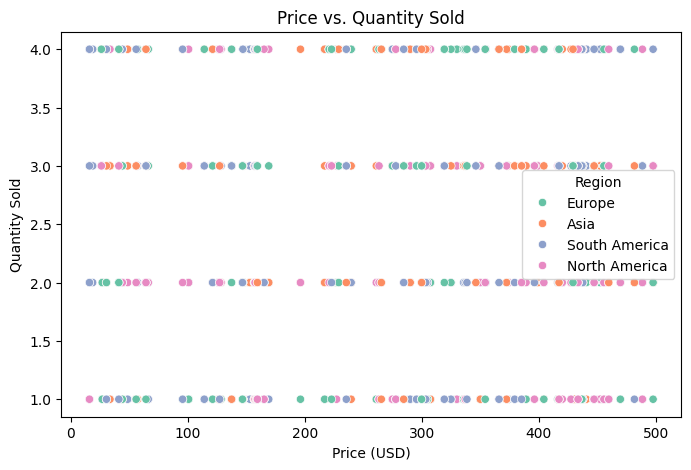

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Convert columns to appropriate datatypes
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID", how="left")

# Insight 1: Transactions by Region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='muted')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.show()

# Insight 2: Average Signup to Transaction Time
merged_data['SignupToTransactionDays'] = (merged_data['TransactionDate'] - merged_data['SignupDate']).dt.days
avg_days = merged_data.groupby('Region')['SignupToTransactionDays'].mean()
print("Average Days from Signup to First Transaction by Region:")
print(avg_days)

# Insight 3: Revenue Trends by Month
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum()
monthly_revenue.plot(kind='line', figsize=(10, 6), color='orange')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

# Insight 4: High Revenue Generating Customers
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='cool')
plt.title("Top 10 Customers by Total Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue (USD)")
plt.show()

# Insight 5: Product Price and Quantity Distribution
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='Price', y='Quantity', hue='Region', palette='Set2')
plt.title("Price vs. Quantity Sold")
plt.xlabel("Price (USD)")
plt.ylabel("Quantity Sold")
plt.show()
